In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
recession=pd.read_csv('USRECD.csv')

In [4]:
recession.head(5)

,DATE,USRECD
0,1990-01-01,0
1,1990-01-02,0
2,1990-01-03,0
3,1990-01-04,0
4,1990-01-05,0


In [5]:
SP500=pd.read_csv('S&P500.csv')

In [6]:
SP500.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000


In [7]:
volatility=pd.read_csv('DDSM01USA066NWDB.csv')

In [46]:
volatility.head(5)
volatility.shape
# volatility.columns

(31, 2)

In [9]:
SP500_adjclose=SP500.loc[:,['Date','Adj Close']]

In [10]:
SP500_adjclose.head()

,Date,Adj Close
0,1990-01-02,359.690002
1,1990-01-03,358.760010
2,1990-01-04,355.670013
3,1990-01-05,352.200012
4,1990-01-08,353.790009


In [21]:
SP500_adjclose=SP500_adjclose.merge(recession,left_on='Date',right_on='DATE')

Locator attempting to generate 8870 ticks ([-403.0, ..., 8466.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8870 ticks ([-403.0, ..., 8466.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8870 ticks ([-403.0, ..., 8466.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8870 ticks ([-403.0, ..., 8466.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8870 ticks ([-403.0, ..., 8466.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8870 ticks ([-403.0, ..., 8466.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8870 ticks ([-403.0, ..., 8466.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8870 ticks ([-403.0, ..., 8466.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8870 ticks ([-403.0, ..., 8466.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8870 ticks ([-4

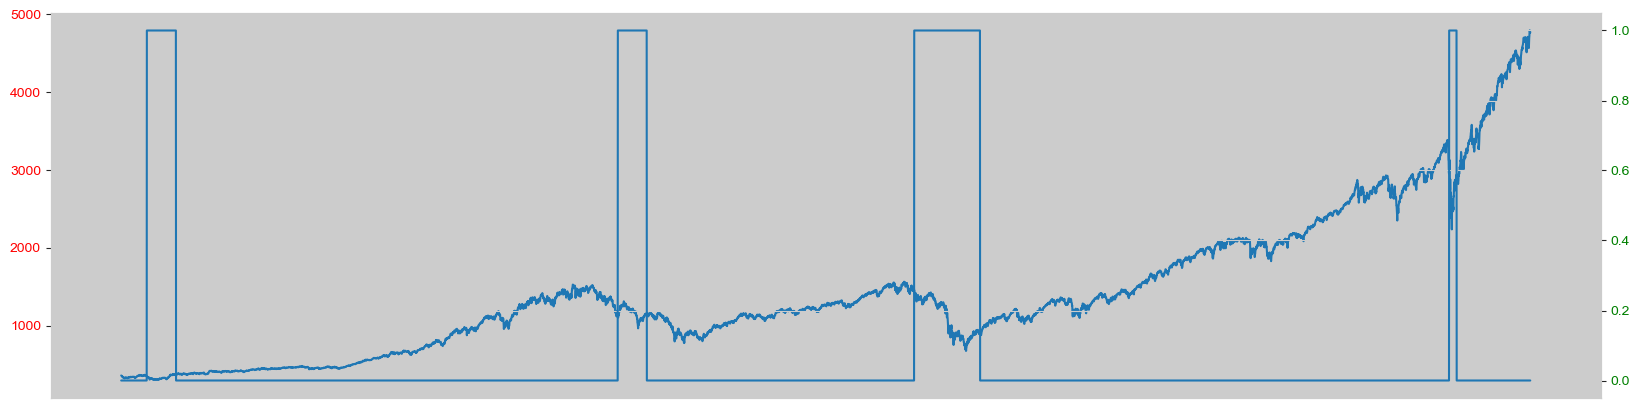

In [47]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(5)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Plot linear sequence, and set tick labels to the same color
ax.plot(SP500_adjclose['Date'],SP500_adjclose['Adj Close'],label = "adj_close")
# ax.plot(SP500_adjclose['Date'],volatility['DDSM01USA066NWDB'],label = "volatility")
ax.tick_params(axis='y', labelcolor='red')
# plt.xticks([0,500])
# plt.xticks([1], ['1'],
#        rotation=20)
# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(SP500_adjclose['Date'],SP500_adjclose['USRECD'],label = "USRECD")
# ax2.set_yscale('logit')
ax2.tick_params(axis='y', labelcolor='green')